In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('technical_support_data.csv')

In [3]:
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [4]:
# PROBLEM_TYPE만 빼고 가져오기
X = df.drop('PROBLEM_TYPE', axis=1)

In [6]:
X.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.0,75,25
1,12,2.0,150,0.01,0.5,5,95
2,5,1.0,35,0.02,0.2,90,10
3,3,2.0,8,0.01,0.7,5,95
4,45,2.3,54,0.15,0.0,99,1


Kmeans import하기

In [7]:
from sklearn.cluster import KMeans

wcss 테스트 최적화

In [8]:
wcss = []
for i in np.arange(1, 10+1):
    km = KMeans(n_clusters=i, init='k-means++', random_state=1)
    # 여기에서는 학습, 이 결과를 토대로 아래서 fit_predict()을 한다
    km.fit(X)
    wcss.append(km.inertia_)

the Elbow Method 차트 그리기

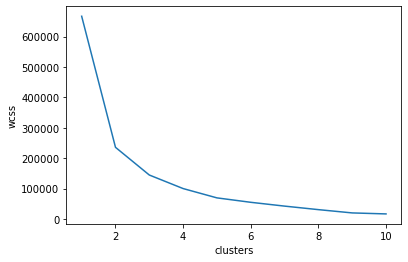

In [10]:
plt.plot( np.arange(1, 10+1), wcss)
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()


Kmean() 위의 결과로 다시 생성

In [11]:
# 위의 결과로 n_clusters= 파라미터를 넘김, 3이나 5정도가 좋아 보임
km = KMeans(n_clusters=3, init='k-means++', random_state=1)

In [13]:
y_kmeans = km.fit_predict(X)

In [14]:
df['cluster'] = y_kmeans

차트그리기 scatter

In [16]:
X = X.values

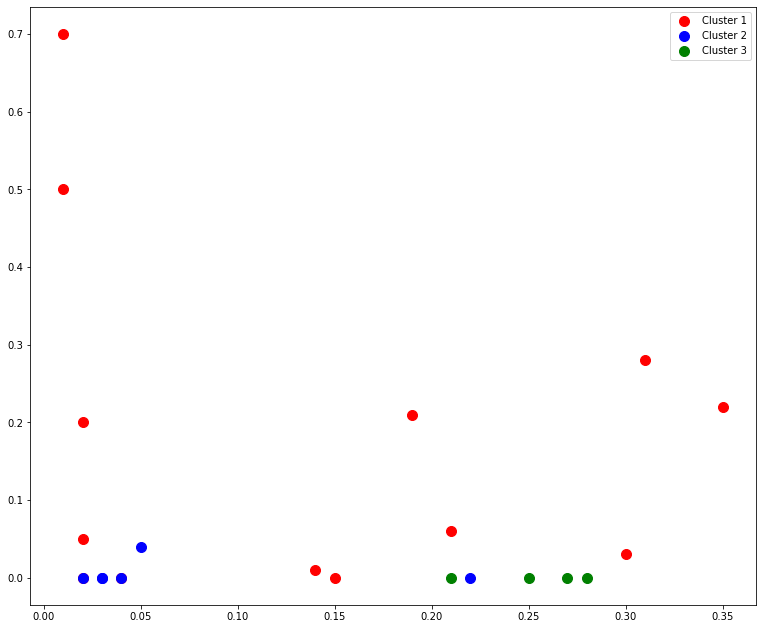

In [17]:
plt.figure(figsize=(13,11))
# kmean 0 그룹만 표시
#  X[y_kmeans ==0, 3] 은 y_kmeans 에서 0이면 true반환, 3번째 열 
# 일단 scatter에서는 x, y 두 축으로만 보여줄 수 있으니깐, 다른 컬럼 수를 넣어주면 그 2개를 비교해서 그릴 수 있음
# 컬럼들이 많지만 scatter는 2개 축만으로 비교하므로 2개씩만 선택
plt.scatter(X[y_kmeans == 0, 3], X[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
# kmean 1 그룹만 표시
plt.scatter(X[y_kmeans == 1, 3], X[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
# kmean 2 그룹만 표시
plt.scatter(X[y_kmeans == 2, 3], X[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')

#plt.title('Clusters of Customers')
#plt.xlabel('Anual Income')
#plt.ylabel('Spending Score')
# 위의 보조 색깔표시 (색깔이 어떤 cluster인지 표시)
plt.legend()
plt.show()